<a href="https://colab.research.google.com/github/YNWA-Algo/IBM-MLAI-CERT-PROJECT3/blob/main/5_M2_3regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Performing Linear Regression in Keras**


Estimated time needed: **30** minutes


During the pandemic, a bike-sharing service had suffered considerable losses in their revenues. As a data scientist on the analytics team, you have been tasked to help with coming up with a business plan to accelerate the company's revenue. The first step in this process is to understand the current demand for shared bikes among the people in the city.

You recommend that the team first try to understand the factors on which the demand for these shared bikes depends. In this lab, we will perform a linear regression to predict the count of total rental bikes, and understand the impact of some contributing factors.

<center>
    <img src="https://live.staticflickr.com/36/84666910_b889a5ad04_b.jpg" width="300" alt="tulip flower">
<center>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Linear regression">Linear regression</a>
        <ol>
            <li><a href="#Bike-sharing-dataset">Bike sharing dataset</a></li>
            <li><a href="#Clean-the-data">Clean the data</a></li>
            <li><a href="#Data-exploration-:-Bivariate-analysis">Data exploration: Bivariate analysis</a></li>
            <li><a href="#Data exploration-:-Multivariate-analysis">Data exploration: Multivariate analysis</a></li>
            <li><a href="#Data exploration-:-Heatmap-of-columns">Data exploration: Heatmap of columns</a></li>
            <li><a href="#Split-the-data-into-training-and-test sets">Split the data into training and test sets</a></li>
            <li><a href="#Split-features-from-labels">Split features from labels</a></li>
            <li><a href="#Normalization">Normalization</a></li>
            <li><a href="#Linear-regression-with-a-single-input">Linear regression with a single input</a></li>
            <li><a href="#Linear-regression-with-a-multiple-inputs">Linear regression with a multiple inputs</a></li>
        </ol>
    </li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(Auto-MPG)">Exercise 1. Loading a dataset (Auto MPG)</a></li>
    <li><a href="#Exercise-2---Clean-the-data">Exercise 2. Clean the data</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3. Split the data</a></li>
    <li><a href="#Exercise-4---Create-a-normalization-layer">Exercise 4. Create a normalization layer</a></li>
    <li><a href="#Exercise-5---Linear-regression-with-multiple-inputs">Exercise 5. Linear regression with multiple inputs</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Build single-variable and multi-variable linear regression models using Keras.
 - Use linear regression to predict a continuous target variable given a set of input features


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the following code cell.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install -q pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [2]:
%%capture
!pip install --upgrade tensorflow

### Importing Required Libraries

_We recommend you import all required libraries in one place, as follows:_


In [3]:
import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.metrics import mean_squared_error

sns.set_context('notebook')
sns.set_style('white')

## Linear Regression


Linear Regression models are typically used to study the relationship between a single dependent variable $Y$ and one or more independent variable $X$.

They have an easy-to-interpret mathematical formula that can generate predictions. A simple linear regression model can be used when working with one independent variable, and a multiple regression model can be used when there are more than one independent variables.

We can start with a hypothesis that resembles the line, $Y=\theta_0X+\theta_1$, where $\theta_0$ and $\theta_1$ are the regression coefficients.

Now how do we pick the values of ($\theta_0$) and ($\theta_1$) so that our model predictions are accurate?

We use an optimization method to minimize the loss function so as to reduce the error between model predictions and the ground truth. We start by picking random values of ($\theta_0$) and ($\theta_1$), and continue to update values of the coefficients till convergence. If our loss function stops decreasing, we have reached our local minima.

In multiple linear regression, we use more than one independent features ($X$) and a single dependent feature ($Y$). If we have $n$ features, our formula is as follows. Instead of considering a vector of ($m$) data entries, we will consider the ($n X m$) matrix of $X$.

$Y=\theta_0+\theta_1X_1+\theta_2X_2+\theta_3X_3+...++\theta_nX_n$


### Bike sharing dataset

We will be using the bike-sharing dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01). It contains the following features:

> - instant: record index
> - dteday : date
> - season : season (1:winter, 2:spring, 3:summer, 4:fall)
> - yr : year (0: 2011, 1:2012)
> - mnth : month ( 1 to 12)
> - hr : hour (0 to 23)
> - holiday : weather day is holiday or not (extracted from [Web Link](https://dchr.dc.gov/page/holiday-schedules?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01))
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> - weathersit :(1) Clear, Few clouds, Partly cloudy, Partly cloudy, (2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, (3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, (4) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
> - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
> hum: Normalized humidity. The values are divided to 100 (max)
> windspeed: Normalized wind speed. The values are divided to 67 (max)
> casual: count of casual users
> registered: count of registered users
> cnt: count of total rental bikes including both casual and registered


Download the dataset, and unzip the `Bike-Sharing-Dataset.zip` folder.


In [4]:
!pip install skillsnetwork


In [5]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/Bike-Sharing-Dataset.zip",overwrite=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Saved to '.'


We will be using the `day.csv` file.


In [6]:
raw_dataset = pd.read_csv('day.csv')

Let's look at some samples rows from the dataset we loaded:


In [7]:
raw_dataset.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
328,329,2011-11-25,4,0,11,0,5,1,1,0.375000,0.380671,0.643750,0.098896,1095,1697,2792
102,103,2011-04-13,2,0,4,0,3,1,2,0.412500,0.417283,0.819167,0.250617,209,1953,2162
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455
548,549,2012-07-02,3,1,7,0,1,1,1,0.781667,0.702038,0.447083,0.195267,904,5323,6227
296,297,2011-10-24,4,0,10,0,1,1,1,0.463333,0.457067,0.772083,0.118792,699,3488,4187


### Clean the data


Let us drop the `dteday` column as it is not numerical, and we already have some other date like features like `mnth`, `year` and `weekday`.

We will remove `instant` as it is just a row instance identifier.

We will also drop `registered` and `casual` as they are used to compute our target variable `cnt` and including them would result in data leakage.


In [8]:
raw_dataset = raw_dataset.drop(columns=['dteday', 'instant', 'registered', 'casual'])

### Data exploration: Bivariate analysis


We will create scatterplots for a few numerical variables against the target variable `cnt`.


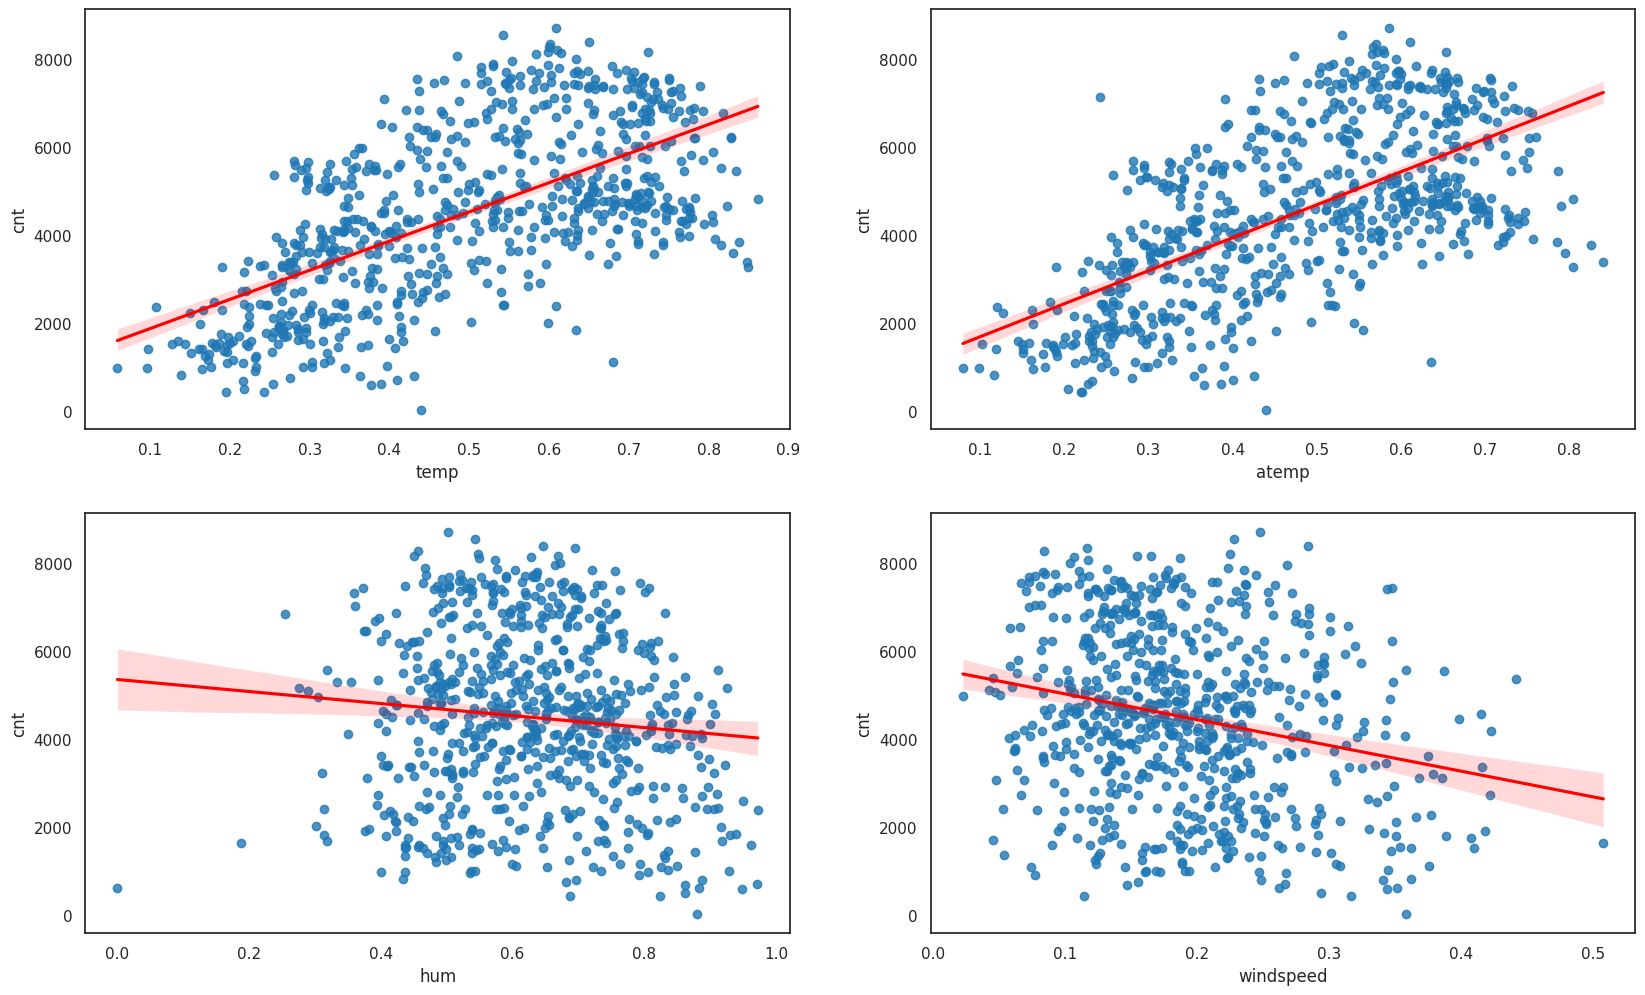

In [9]:
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=[20,12])
for i in enumerate(col):
    plt.subplot(2,2,i[0]+1)
    sns.regplot(data=raw_dataset,x=i[1],y='cnt',line_kws={"color":'red'})

plt.show()

From this, we can infer that there is a positive correlation between `temp` and `atemp` and `cnt`. There is a negative correlation between `windspeed` and `hum` and `cnt`.


Similarly, we can perform a bivariate analysis on the categorical variables.


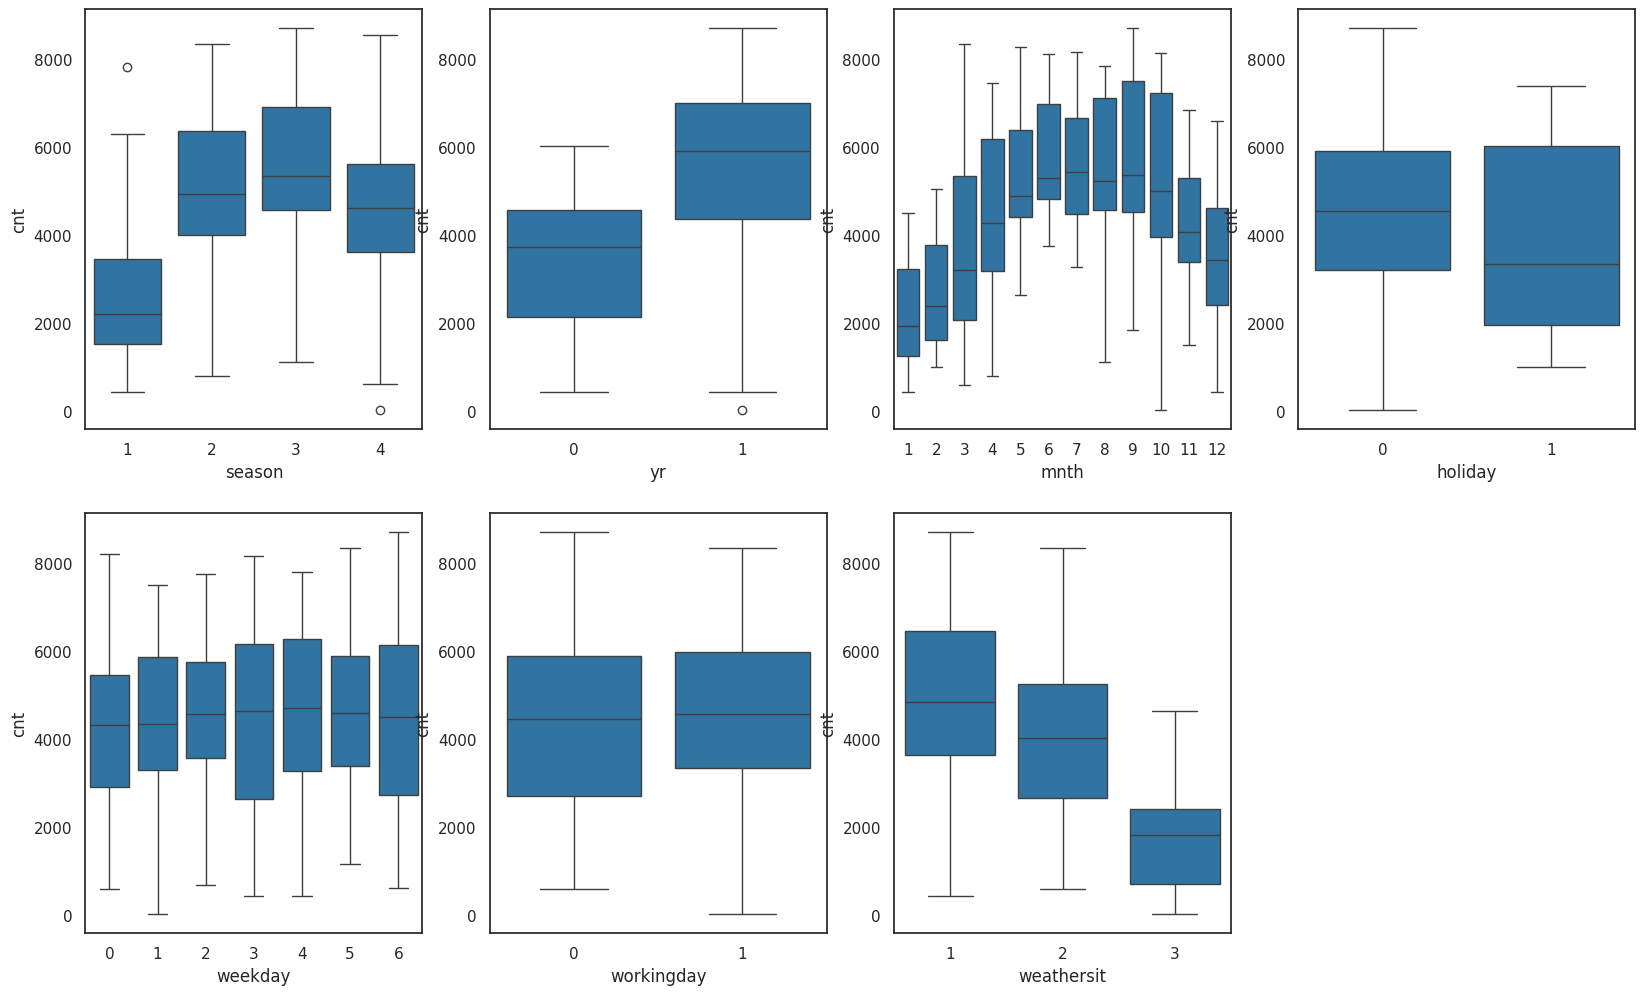

In [10]:
col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=[20,12])
for i in enumerate(col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=raw_dataset,x=i[1],y='cnt')

plt.show()

From this we infer that rental bike demands are the highest during Fall and lowest during Spring. There was an increase in demand in bikes in 2019 as compared to 2018. A higher demand for bikes is observed on non-holidays as compared to holidays. Lastly, when renting bikes, clear weather is preferred over light rain, thunderstorm and snowy days.


### Data exploration: Multivariate analysis


We can perform multivariate analysis by creating a pairplot of all the columns in our dataset.


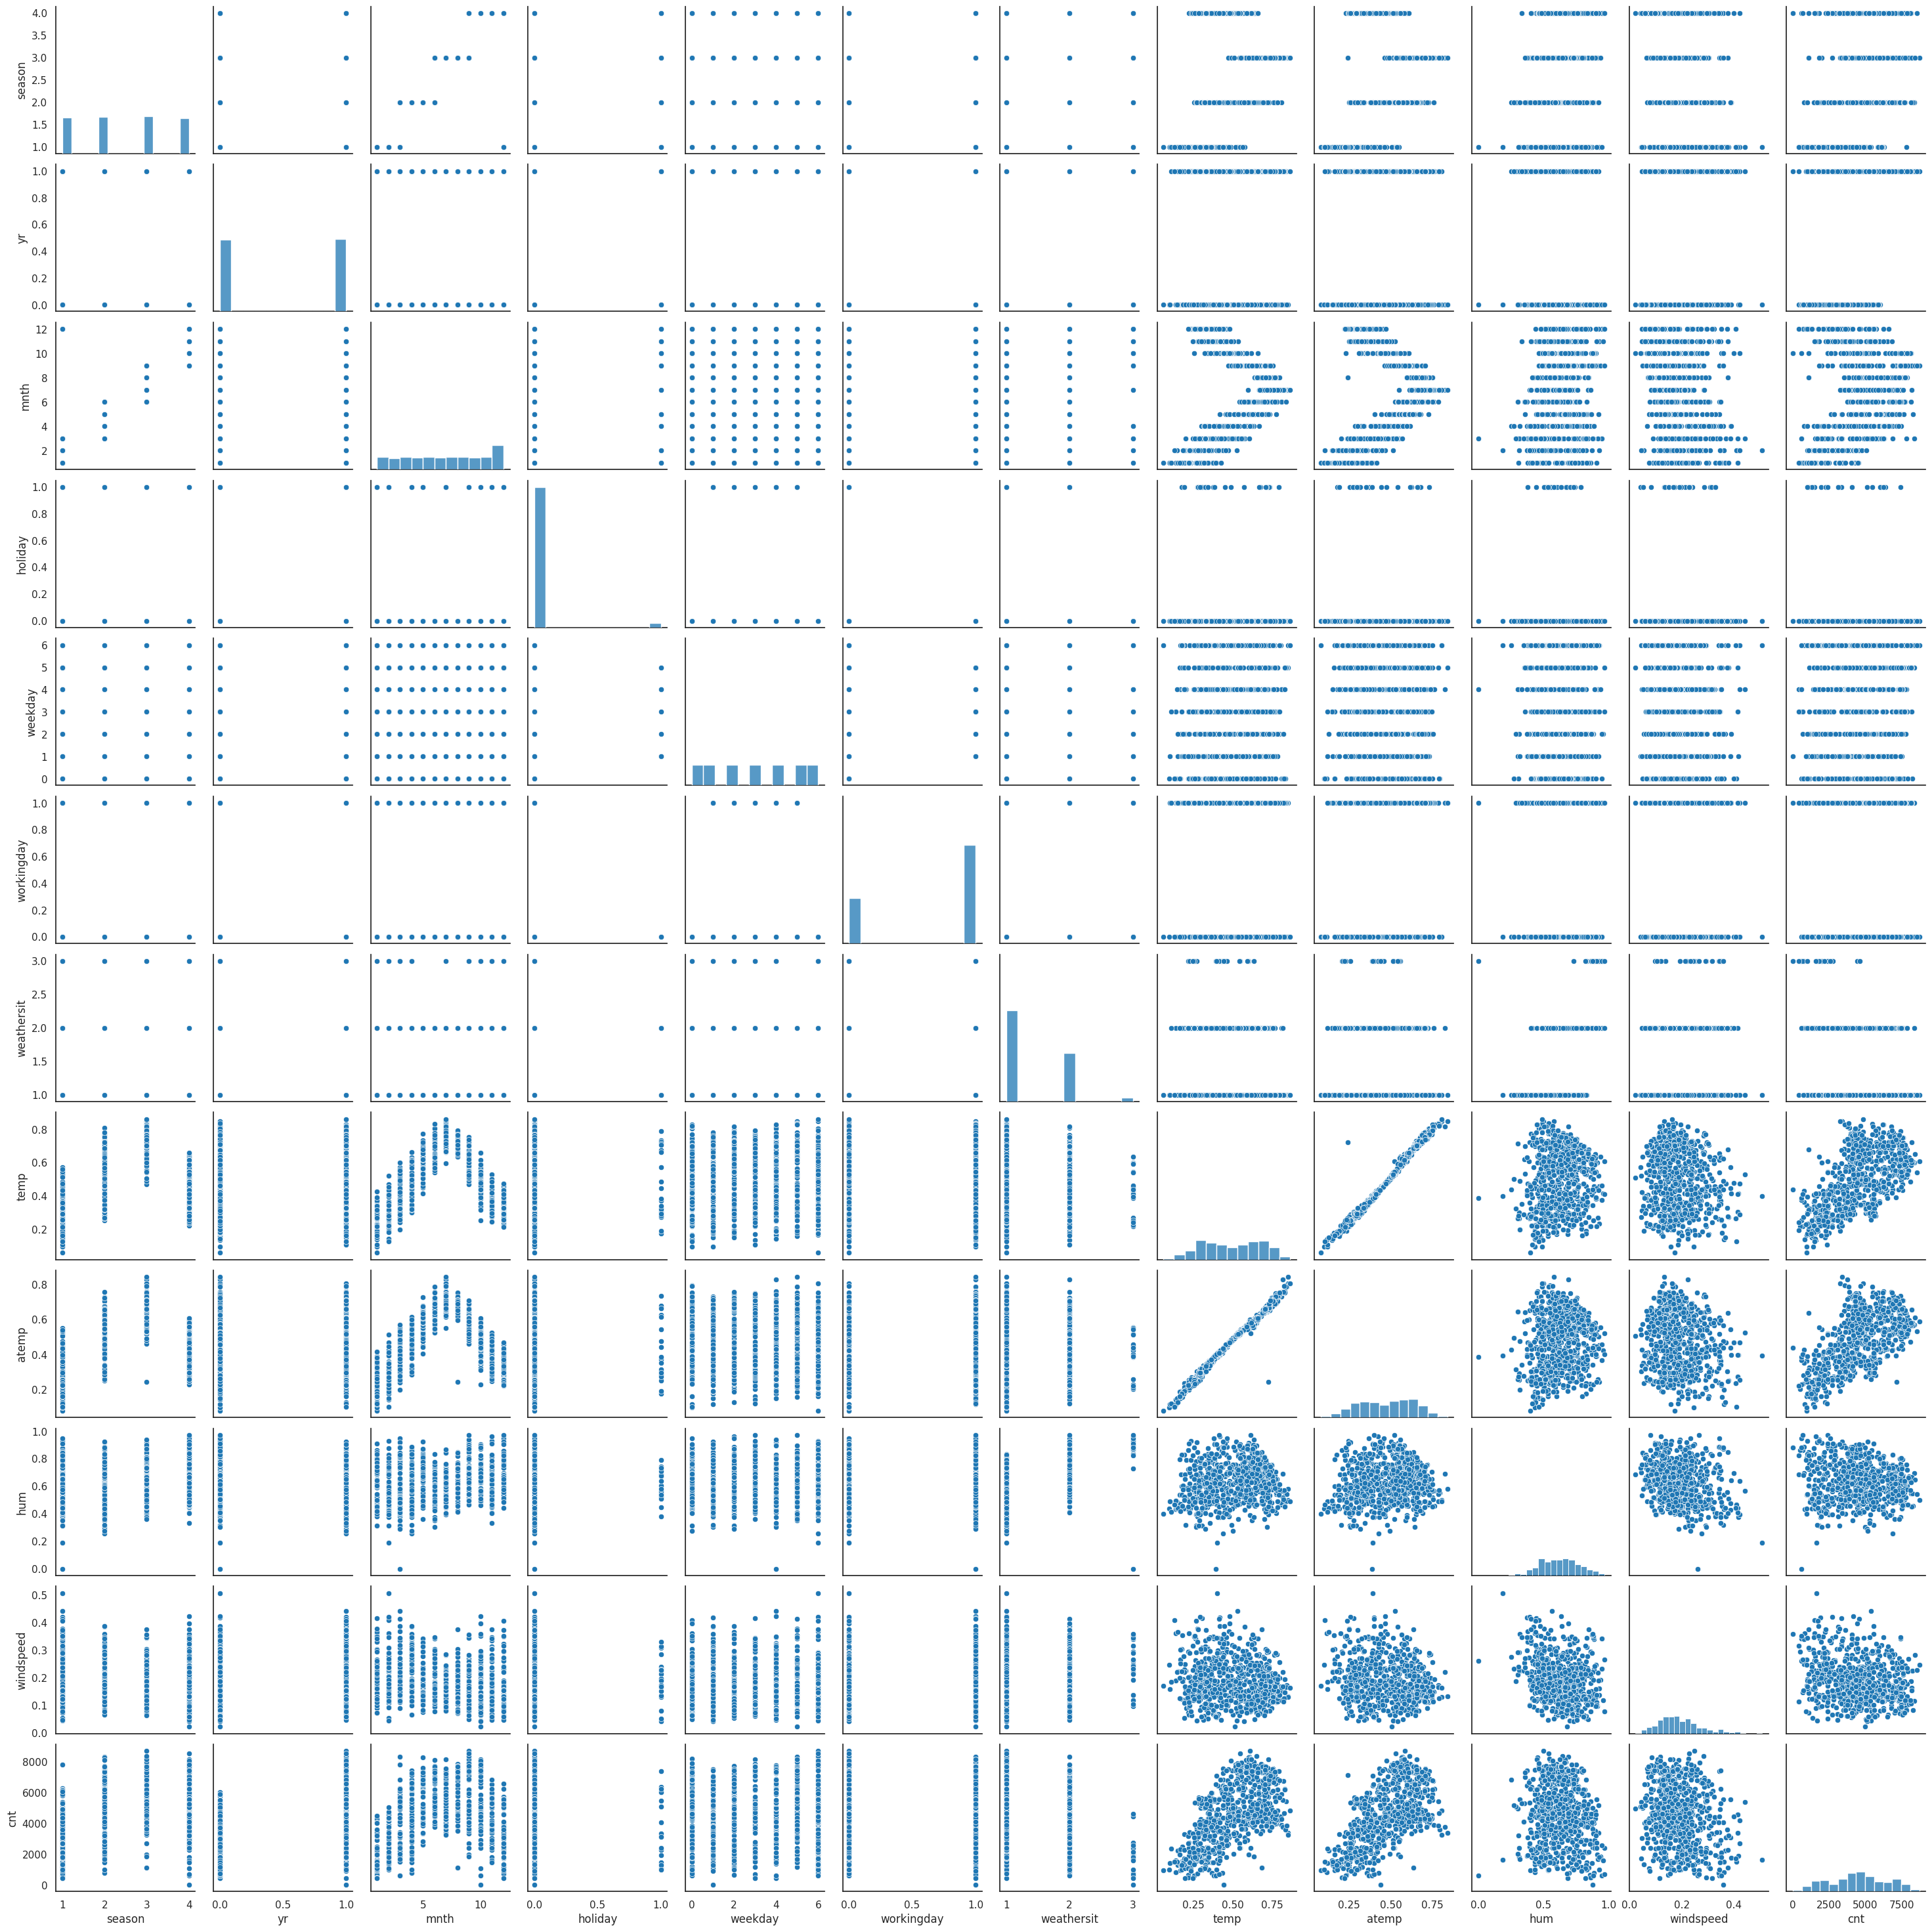

In [11]:
sns.pairplot(raw_dataset)

### Data exploration: Heatmap of columns


Using a heatmap we can explore which variables are positively or negatively correlated with one another.


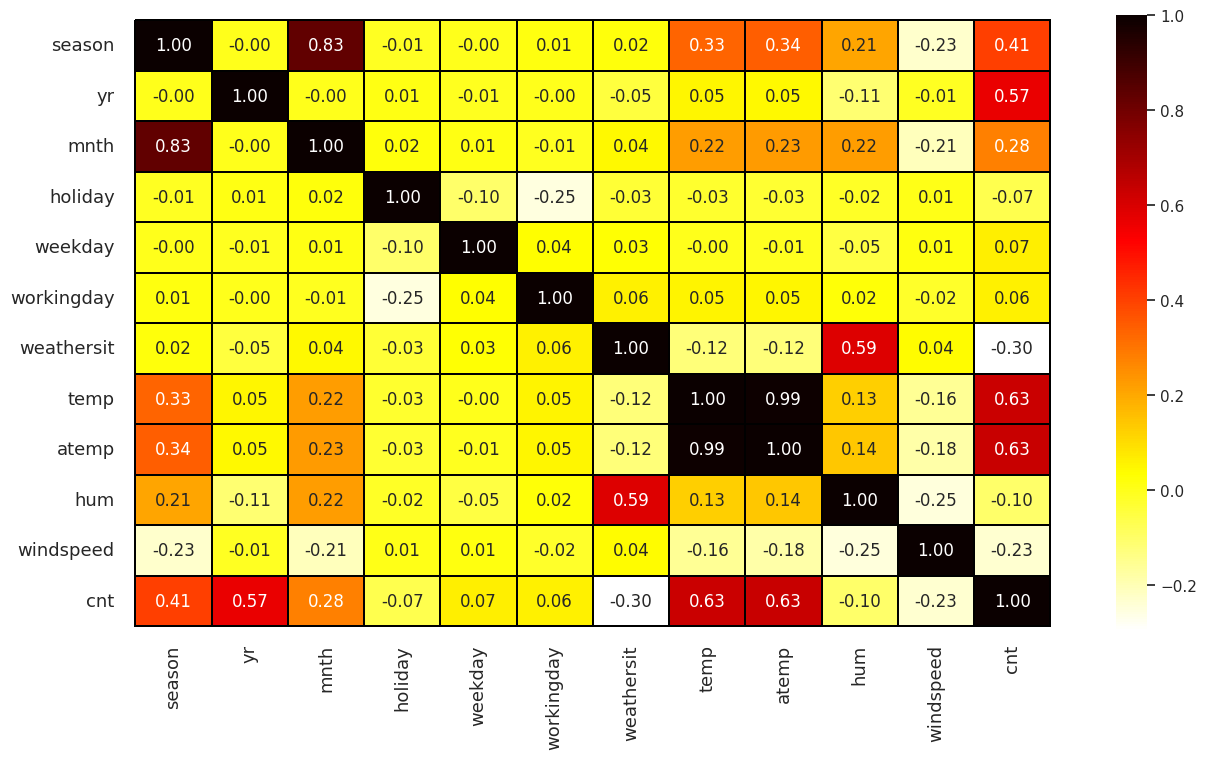

In [12]:
plt.figure(figsize=[15,8])
fig = sns.heatmap(raw_dataset.corr(),cmap='hot_r',
            annot=True,linecolor='black',linewidths=0.01,annot_kws={"fontsize":12},fmt="0.2f")

top, bottom = fig.get_ylim()
fig.set_ylim(top+0.1,bottom-0.1)

left, right = fig.get_xlim()
fig.set_xlim(left-0.1,right+0.1)

plt.yticks(fontsize=13,rotation=0)
plt.xticks(fontsize=13,rotation=90);

From the heatmap, we can infer that `temp` and `atemp` are highly correlated with each other and with `cnt`.

A positive correlation between `temp`, `atemp`, `yr` and `cnt` exists, while a negative correlation between `windspeed`, `hum`, `weathersit`, `holiday` and `cnt` exists.


### Split the data into training and test sets


Now we will split the data set into a training set and a test set. The test set will be used in the final evaluation of your models.


In [13]:
train_dataset = raw_dataset.sample(frac=0.8, random_state=0)
test_dataset = raw_dataset.drop(train_dataset.index)

### Split features from labels


Separate the target value from the features. This label is the value that you will train the model to predict.


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('cnt')
test_labels = test_features.pop('cnt')

### Normalization


Since the features in this dataset use different scales and ranges, it is generally considered good practice to normalize the features before performing linear regression. This is partly because the features are multiplied by model weights, and the scale of the outputs and gradients are impacted by that of the inputs. Even though it is possible for the model to converge without any feature normalization, the process of normalization makes the training much more stable.


We will use `tf.keras.layers.Normalization` as a clean and simple way to add feature normalization to our model.

Let us first create a normalization layer. We will use `axis=-1` as an input argument. As per the [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01):

> The axis or axes that should have a separate mean and variance for each index in the shape. For example, if shape is (None, 5) and axis=1, the layer will track 5 separate mean and variance values for the last axis. If axis is set to None, the layer will normalize all elements in the input by a scalar mean and variance. Defaults to -1, where the last axis of the input is assumed to be a feature dimension and is normalized per index.


In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Now using `normalization.adapt`, we will fit the state of the pre-processing layer to the training data.

This will compute the mean and variance of the data and store them as the layer's weights.


In [16]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance:


In [17]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[2.4820514  0.50598294 6.557265   0.02735043 2.9931624  0.6803419
  1.4        0.49609548 0.47542128 0.6289289  0.19085288]]
[[1.2274556e+00 2.4996421e-01 1.1894584e+01 2.6602382e-02 4.0580730e+00
  2.1747680e-01 2.9811966e-01 3.2840721e-02 2.6041929e-02 2.0187266e-02
  6.0876710e-03]]


When the layer is called, it returns the input data, with each feature independently normalized. For example, let us look at the first input row:


In [18]:
print(np.array(train_features[:1]))

[[3.       0.       7.       0.       6.       0.       1.       0.686667
  0.638263 0.585    0.208342]]


Now, let us look at the normalized input:


In [19]:
print(normalizer(np.array(train_features[:1])).numpy())

[[ 0.46750233 -1.0120384   0.12837175 -0.16768871  1.4926226  -1.4588839
  -0.7325962   1.0516028   1.009088   -0.30918026  0.22415186]]


### Linear regression with a single input


We can build a linear regression model using one or several variables.


Let us begin by building a single-variable linear regression to predict `'cnt'` from `'temp'`. We are using `temp` because it is highly correlated with `cnt` and should be highly predictive.

We will use Keras to define a `tf.keras.Sequential` model architecture.

Here are the steps we will follow to create our single-variable linear regression model:

- Using the `tf.keras.layers.Normalization` preprocessing layer that we created earlier, we will normalize the `'temp'` input features.
- Then we will apply a linear transformation to produce 1 output using a linear layer `tf.keras.layers.Dense`.


Note that as per the documentation, the input can either be set by the `input_shape` argument, or automatically when the model is run for the first time.


Next, we create an array made of the `temp` features.


In [20]:
temp = np.array(train_features['temp'])

Then we will instantiate the `tf.keras.layers.Normalization` and fit its state to the data like we did before.


In [21]:
temp_normalizer = layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(temp)

Build the Keras model:


In [22]:
temp_model = tf.keras.Sequential([
    temp_normalizer,
    layers.Dense(units=1)
])
temp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

Now, let us configure the training procedure using `model.compile()`. Here, `loss` is used to define the loss function, which computes the quantity that a model should seek to minimize during training. And `optimizer` defines the optimizer that is used to change weights and learning rate during training to minimize losses.


In [23]:
temp_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error')

Using `keras.fit`, we train the model for 100 epochs.


In [24]:
%%time
history = temp_model.fit(
    train_features['temp'],
    train_labels,
    # to view the logs, uncomment this:
    verbose=False,
    epochs=100,
    # validation split: 20% of the training data.
    validation_split = 0.2)

CPU times: user 7.37 s, sys: 392 ms, total: 7.76 s
Wall time: 9.22 s


We can create a plot of loss on the training and validation datasets over training epochs.


In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)

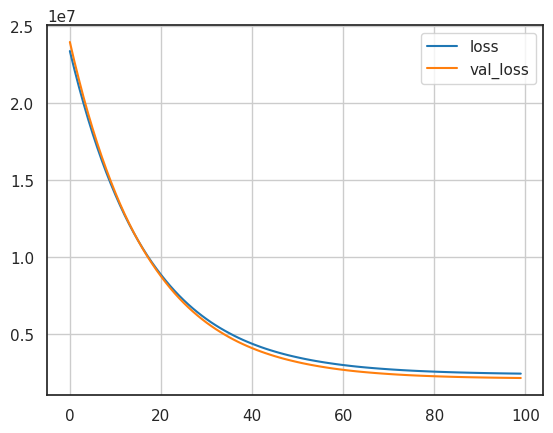

In [26]:
plot_loss(history)

Next, we will use `model.predict` to predict the `cnt` values in the test dataset, using just the `temp` feature values as input:


In [27]:
y_pred= temp_model.predict(test_features['temp'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


We can compute the root mean squared error:


In [28]:
print(np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))

1437.0808490807447


Since this a single-variable linear regression, we can easily visualize the results:


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


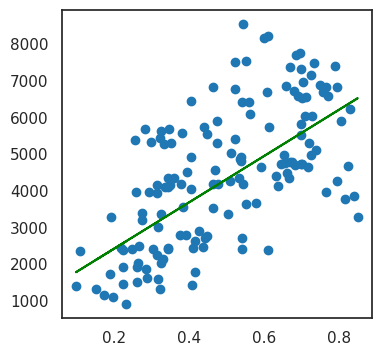

In [29]:
plt.figure(figsize = (4,4))
plt.plot(test_features['temp'], test_labels,'o',
         test_features['temp'],temp_model.predict(test_features['temp']),'g')
plt.show()

### Linear regression with multiple inputs


We will create a similar setup to predict `cnt` based on multiple inputs. In this case, in our $y = mx+b$ equation, $m$ will be a matrix and $b$ will be a vector.

Similar to what we did before, the Sequential model will have `normalizer` as the first layer, and `Dense` as the second layer:


In [30]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

We will compile the model using `complie()` and train the model on 100 epochs using `fit()`:


In [31]:
linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error')

In [32]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # to view the logs, uncomment this:
    verbose=0,
    # validation split: 20% of the training data.
    validation_split = 0.2)

CPU times: user 7.57 s, sys: 410 ms, total: 7.98 s
Wall time: 9.07 s


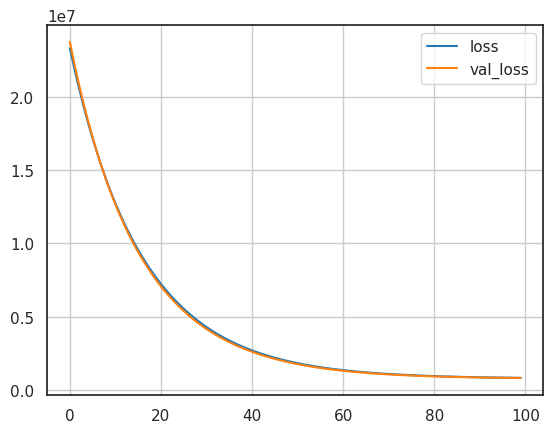

In [33]:
plot_loss(history)

We can see that with all the inputs in the regression model, it achieves a much lower training and validation error, and RMSE than the `temp_model` that had just one input.


In [34]:
y_pred= linear_model.predict(test_features)
print(np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
902.9931331829051


`get_weights` returns a list consisting of NumPy arrays. The first array gives the weights of the layer and the second array gives the biases.


In [35]:
# Print column names for reference
print("Column names")
print(test_features.columns)

# Print weights and biases for each layer
for layer in linear_model.layers:
    print("Layer Name:", layer.name)
    print("---")
    print("Weights")
    print("Shape:",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
    print("---")
    print("Bias")
    print("Shape:",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')


Column names
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
Layer Name: normalization
---
Weights
Shape: (11,) 
 [2.4820514  0.50598294 6.557265   0.02735043 2.9931624  0.6803419
 1.4        0.49609548 0.47542128 0.6289289  0.19085288]
---
Bias
Shape: (11,) 
 [1.2274556e+00 2.4996421e-01 1.1894584e+01 2.6602382e-02 4.0580730e+00
 2.1747680e-01 2.9811966e-01 3.2840721e-02 2.6041929e-02 2.0187266e-02
 6.0876710e-03] 

Layer Name: dense_1
---
Weights
Shape: (11, 1) 
 [[ 359.70132 ]
 [ 994.72217 ]
 [  48.980633]
 [-136.93822 ]
 [ 157.04486 ]
 [  76.7979  ]
 [-356.307   ]
 [ 477.4685  ]
 [ 513.6048  ]
 [-164.59613 ]
 [-214.98277 ]]
---
Bias
Shape: (1,) 
 [4293.4717] 



From the model weights, we can see that, similar to what we had seen in our heatmap, `yr`, `temp` and `atemp` have the highest model weights, and hence contribute the most the `cnt` predictions.


## Using Neural Networks for Linear Regression


In this section, we will use a Neural Network architecture in Keras to perform simple linear regression.


Let us begin by reading our univariate dataset. We will use the Iowa Housing dataset where the only feature is SquareFeet, and the target value is SalePrice.


We will reserve the last 500 data points for testing purposes.


In [36]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/IowaHousingPrices.csv')

x_train = df[['SquareFeet']].values[1:-500]
y_train = df[['SalePrice']].values[1:-500]
x_test = df[['SquareFeet']].values[-500:]
y_test = df[['SalePrice']].values[-500:]

Now, we'll define the model configuration parameters. Since we're dealing with a univariate dataset, both our input and output sizes are 1. The learning rate is selected arbitrarily, where the goal is to ensure the NN doesn't overfit to the training data, and is easily generalizable to unseen test sets. We will use mean squared error as the loss function, and train the model on 30 iterations.


In [38]:
output_size=1
hidden_layer=500
input_size=1
learning_rate=0.51
loss_function='mean_squared_error'
epochs=30
batch_size=10

We will create a `Sequential` model and add a Dense layer with a relu activation in the hidden layer with ```hidden_layer``` neurons. As we have one output the output layer will have a dimension of  one.


In [39]:
model = keras.Sequential()
model.add(keras.layers.Dense(hidden_layer,  activation='relu'))

model.add(keras.layers.Dense(output_size))

Next, we will compile and fit the model based on the configuration parameters defined earlier.


In [42]:
model.compile(keras.optimizers.Adam(learning_rate=learning_rate), loss_function)

In [43]:
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7414339072.0000
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4272457216.0000
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4182150400.0000
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3274300160.0000
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3554862080.0000
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3240669440.0000
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3250832128.0000
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2963143936.0000
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3856411136.0000
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2947212032.0000
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2828567296.0000
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3196139264.0000
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3022088960.0000
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━

Let us predict the sales prices on the full range of the test set and plot the result.


In [44]:
x=np.arange(x_test.min(),x_test.max(),10).reshape(-1,1)

In [45]:
y_pred = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


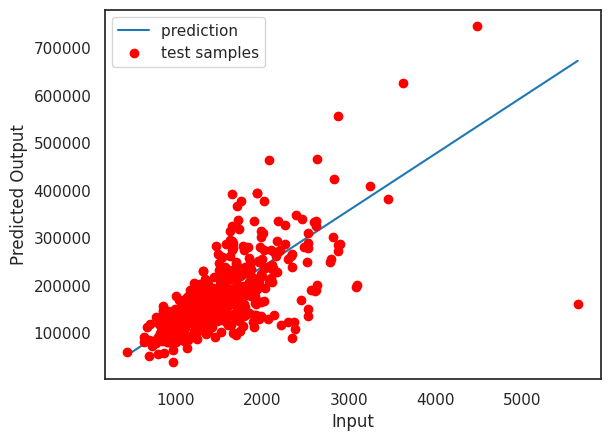

In [46]:
plt.plot(x,y_pred,label="prediction ")
plt.plot(x_test,y_test,'ro',label="test samples")
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.legend()
plt.show()

The model performs relatively well on the test set.


# Exercises


In this section, you will train a linear regression model in Keras. We will be using the classic Auto MPG dataset, and predict the fiel efficiency of automobiles.


### Exercise 1 - Loading a dataset (Auto MPG)


The dataset is again found in the UCI Machine Learning Repository. You can download it from [here](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01).


In [49]:
# Write your solution here:

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

<details>
    <summary>Click here for Solution</summary>

```python
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
```

</details>


### Exercise 2 - Clean the data


Drop all the rows that have NA values, and remove the `origin` column as it is categorical.


In [50]:
# Write your solution here

dataset = raw_dataset.dropna()
dataset = dataset.drop(columns=['Origin'])



<details>
    <summary>Click here for Solution</summary>

```python
dataset = raw_dataset.dropna()
dataset = dataset.drop(columns=['Origin'])
```

</details>


### Exercise 3 - Split the data


Split the data into training and test, and split the target from features.


In [51]:
# Write your solution here
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

<details>
    <summary>Click here for Solution</summary>

```python
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
```

</details>


### Exercise 4 - Create a normalization layer


Next, use `tf.keras.layers.Normalization` to add feature normalization to the model. Using `normalization.adapt`, fit the state of the pre-processing layer to the training data. Calculate and print the mean and variance.


In [52]:
# Write your solution here
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[   5.477707  195.31847   104.86943  2990.2517     15.559236   75.89809 ]]
[[2.8800762e+00 1.0850414e+04 1.4466995e+03 7.0989681e+05 7.7550263e+00
  1.3467321e+01]]


<details>
    <summary>Click here for Solution</summary>

```python
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())
```

</details>


### Exercise 5 - Linear regression with multiple inputs


Create a linear regression model to predict `MPG` based on all inputs in the dataset. In this case, in our $y = mx+b$ equation, $m$ will be a matrix and $b$ will be a vector.

Similar to what we did before, the Sequential model will have `normalizer` as the first layer, and `Dense` as the second layer. Compile and train the model, and plot the training history.


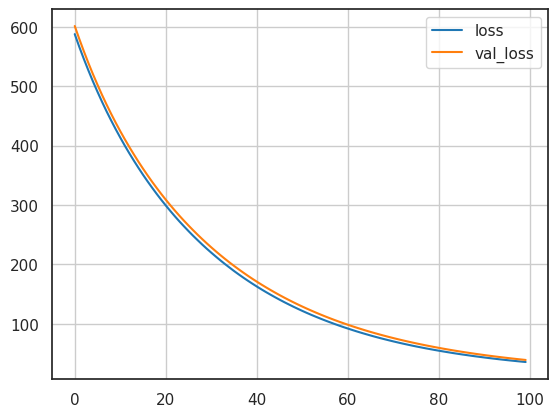

In [53]:
# Write your solution here
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error')

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # to view the logs, uncomment this:
    verbose=0,
    # validation split: 20% of the training data.
    validation_split = 0.2)

plot_loss(history)

<details>
    <summary>Click here for Solution</summary>

```python
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error')

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # to view the logs, uncomment this:
    verbose=0,
    # validation split: 20% of the training data.
    validation_split = 0.2)

plot_loss(history)
```

</details>


Predict the output values of the test set, and compute the RMSE.


In [54]:
# Write your solution here
y_pred= linear_model.predict(test_features)
print(np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5.942595138409647


<details>
    <summary>Click here for Solution</summary>

```python

y_pred= linear_model.predict(test_features)
print(np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))
```

</details>


## Authors


[Kopal Garg](https://www.linkedin.com/in/gargkopal/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01) is a Data Scientist Intern at IBM, and a Masters student in Computer Science at the University of Toronto.


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2022-07-06|0.1|Kopal|Create Lab||2022-08-09|0.2|Steve H.|QA pass|


Copyright © 2022 IBM Corporation. All rights reserved.
